In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [2]:
ls

abcnews-date-text.csv  abcnews-date-text.csv.zip  Text_Clustering_K_Means.ipynb


# Dataset

* news headlines published over a period of 15 years
* ABC (Australian Broadcasting Corp.) Site: http://www.abc.net.au/ prepared by Rohit Kulkarni

In [3]:
data = pd.read_csv("abcnews-date-text.csv")
print('Shape : ', data.shape)
data.head()

Shape :  (1103665, 2)


,publish_date,headline_text
0,20030219,aba decides against community broadcasting licence
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


# Remove duplicates

In [4]:
# keep = False  --- mark all duplicates True
# keep = 'first' --- mark duplicates except the first occurrance as True
# keep = 'last' --- mark duplicates except the last occurrance as True 

data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(10)

,publish_date,headline_text
57973,20031129,10 killed in pakistan bus crash
116304,20040920,10 killed in pakistan bus crash
912357,20141023,110 with barry nicholls
673104,20120217,110 with barry nicholls
676569,20120302,110 with barry nicholls
748865,20121214,110 with barry nicholls
827317,20131017,110 with barry nicholls episode 15
898182,20140820,110 with barry nicholls episode 15
899506,20140826,110 with barry nicholls episode 16
827318,20131017,110 with barry nicholls episode 16


In [5]:
data.drop_duplicates(subset='headline_text', keep='first', inplace=True)

In [6]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(10)

,publish_date,headline_text


# NLP

# TF-IDF

In [7]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]

stop_words = text.ENGLISH_STOP_WORDS.union(punc)
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(data['headline_text'].values)

X

<1076225x96397 sparse matrix of type '<class 'numpy.float64'>'
	with 5525887 stored elements in Compressed Sparse Row format>

In [8]:
print('Datset : ', data.shape)
print('TF-IDF Matrix :', X.shape)

Datset :  (1076225, 2)
TF-IDF Matrix : (1076225, 96397)


In [9]:
word_features = vectorizer.get_feature_names()
print('No. of word features : ', len(word_features))
print()
print(word_features[5000:5100])

No. of word features :  96397

['abyss', 'ac', 'aca', 'acacia', 'acacias', 'acadamy', 'academia', 'academic', 'academics', 'academies', 'academy', 'academys', 'acai', 'acapulco', 'acars', 'acason', 'acasuso', 'acb', 'acbf', 'acc', 'acca', 'accan', 'accc', 'acccc', 'acccs', 'acccused', 'acce', 'accedes', 'accelerant', 'accelerants', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accelerator', 'accen', 'accent', 'accents', 'accentuate', 'accentuates', 'accentuating', 'accenture', 'accept', 'acceptability', 'acceptable', 'acceptably', 'acceptance', 'acceptances', 'accepted', 'accepting', 'acceptor', 'acceptors', 'accepts', 'accerate', 'acces', 'access', 'accessary', 'accessed', 'accesses', 'accessibility', 'accessible', 'accessing', 'accessories', 'accessory', 'accesss', 'acci', 'accid', 'accide', 'acciden', 'accidenatlly', 'accidenbt', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'acciona', 'accis', 'acclaim', 'acclaimed', 'acclamatio

# Stemming and Tokenizing

In [10]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [11]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(data['headline_text'].values)
word_features2 = vectorizer2.get_feature_names()

print("No. of word features : ", len(word_features2))
print()
print(word_features2[:50]) 

No. of word features :  65232

["'a", "'i", "'s", "'t", 'aa', 'aaa', 'aaahhh', 'aac', 'aacc', 'aaco', 'aacta', 'aad', 'aadmi', 'aag', 'aagaard', 'aagard', 'aah', 'aalto', 'aam', 'aamer', 'aami', 'aamodt', 'aandahl', 'aant', 'aap', 'aapa', 'aapt', 'aar', 'aaradhna', 'aardman', 'aardvark', 'aargau', 'aaron', 'aaronpaul', 'aarwun', 'aat', 'ab', 'aba', 'abaaoud', 'ababa', 'aback', 'abadi', 'abadon', 'abal', 'abalon', 'abalonv', 'abama', 'abandon', 'abandond', 'abandong']


In [12]:
#max_features = If not None, build a vocabulary that only consider the 
#top max_features ordered by term frequency across the corpus.

vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(data['headline_text'].values)
words = vectorizer3.get_feature_names()

print("No. of word features : ", len(words))
print()
print(words[:50]) 

No. of word features :  1000

['abbott', 'abc', 'aborigin', 'abus', 'access', 'accid', 'accus', 'act', 'action', 'ad', 'address', 'adelaid', 'admit', 'affect', 'afghan', 'afghanistan', 'afl', 'africa', 'age', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airport', 'al', 'alcohol', 'alert', 'alic', 'alleg', 'allow', 'alp', 'ambul', 'amid', 'andrew', 'anger', 'anim', 'announc', 'anoth', 'anti', 'anzac', 'appeal', 'appear', 'appoint', 'approv', 'area', 'arm', 'armi', 'arrest']


# K-means clustering

# Elbow method to select number of clusters

This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

* Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

1
2
3
4
5
6
7
8
9
10


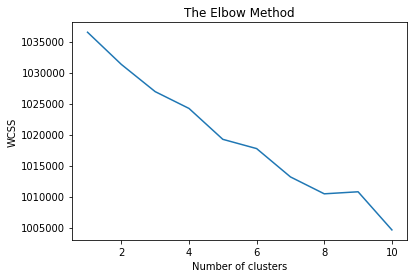

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10, n_init=10, random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    print(i)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As more than one elbows have been generated, we will have to select right amount of clusters by trial and error

# 3 clusters

In [15]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, say, plan, win, council, govt, australia, report, court, charg, kill, fund, urg, warn, water, australian, nsw, face, open, death, chang, year, qld, wa, crash
1 : polic, investig, probe, offic, search, hunt, death, car, drug, arrest, miss, shoot, charg, seek, driver, attack, crash, say, murder, assault, suspect, fatal, raid, warn, station
2 : man, charg, jail, murder, court, polic, die, stab, face, arrest, miss, assault, accus, death, kill, guilti, attack, car, crash, child, shoot, sydney, sex, plead, search
